In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import random
import numpy as np
import math
import importlib
import mcmc_functions
importlib.reload(mcmc_functions)

from mcmc_functions import *
import importlib

seasons_missing_df = pd.read_csv('/Users/josephsun/Desktop/M4R/code/premier-league-matches.csv')
tables_df = pd.read_csv('/Users/josephsun/Desktop/M4R/code/pl-tables-1993-2024.csv')
recent_df = pd.read_csv('matches.csv')
recent_df = recent_df[recent_df['Venue'] == 'Home']


In [27]:
converted_recent_df = convert_match_data(recent_df)
converted_recent_df = converted_recent_df.sort_values(by='Wk').reset_index(drop=True)

seasons_df = pd.concat([seasons_missing_df, converted_recent_df], ignore_index=True)

In [28]:
strength_dict, parameters, acceptance_counters, tracked_parameters, strength_dict_original, parameters_original = (
mcmc(seasons_df, 2020, 2024, burn_in = 3000, iterations = 12000, k = True))

In [29]:
acceptance_counters

{'Strength': {'accepted': 5379, 'total': 9601},
 'Home Advantage': {'accepted': 33,
  'total': 496,
  'percentage': 6.653225806451612},
 'Away Advantage': {'accepted': 25,
  'total': 484,
  'percentage': 5.1652892561983474},
 'Mu_P': {'accepted': 40, 'total': 486, 'percentage': 8.23045267489712},
 'Sigma_P': {'accepted': 40, 'total': 486, 'percentage': 8.23045267489712},
 'Eta': {'accepted': 35, 'total': 496, 'percentage': 7.056451612903227},
 'Sigma_S': {'accepted': 35, 'total': 496, 'percentage': 7.056451612903227},
 'k': {'accepted': 132, 'total': 437, 'percentage': 30.205949656750576}}

/Users/josephsun/Desktop/M4R/code/mcmc_functions.py:715: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  joined_df['Strength History'] = joined_df.values.tolist()


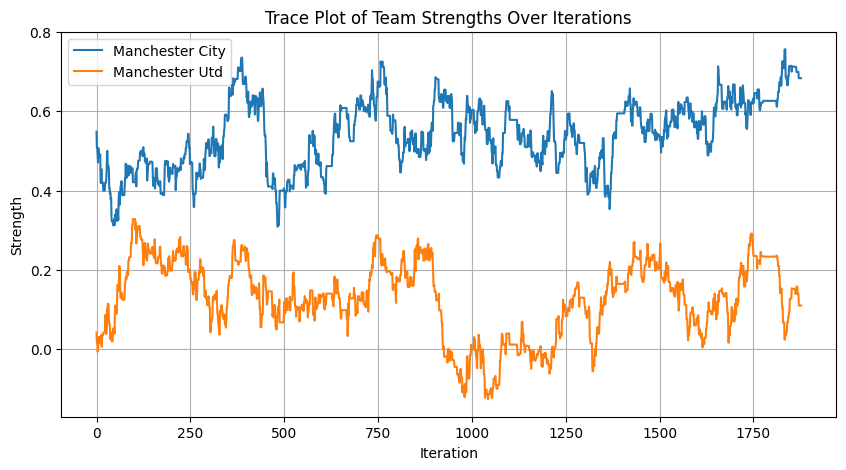

In [30]:
trace_plot_strength(strength_dict, ['Manchester City', 'Manchester Utd'], 2023)

In [31]:
len(strength_dict_original[2022]) - len(strength_dict[2022])

467

In [32]:
strength_dict[2023]

[          Team Name  Strength
 0           Arsenal  0.264215
 1       Aston Villa  0.078053
 2       Bournemouth -0.240956
 3         Brentford  0.032223
 4          Brighton  0.016724
 5           Chelsea  0.199143
 6    Crystal Palace  0.001962
 7           Everton -0.211426
 8            Fulham -0.002616
 9      Leeds United -0.253707
 10   Leicester City  0.056834
 11        Liverpool  0.370325
 12  Manchester City  0.548448
 13   Manchester Utd  0.042243
 14    Newcastle Utd  0.301890
 15  Nott'ham Forest -0.281085
 16      Southampton -0.167579
 17        Tottenham  0.263785
 18         West Ham -0.086457
 19           Wolves -0.174381,
           Team Name  Strength
 0           Arsenal  0.267756
 1       Aston Villa  0.054097
 2       Bournemouth -0.252693
 3         Brentford  0.043115
 4          Brighton  0.021853
 5           Chelsea  0.170178
 6    Crystal Palace -0.015031
 7           Everton -0.164897
 8            Fulham -0.036516
 9      Leeds United -0.205742
 10   L

/Users/josephsun/Desktop/M4R/code/mcmc_functions.py:715: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  joined_df['Strength History'] = joined_df.values.tolist()
/Users/josephsun/Desktop/M4R/code/mcmc_functions.py:715: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  joined_df['Strength History'] = joined_df.values.tolist()


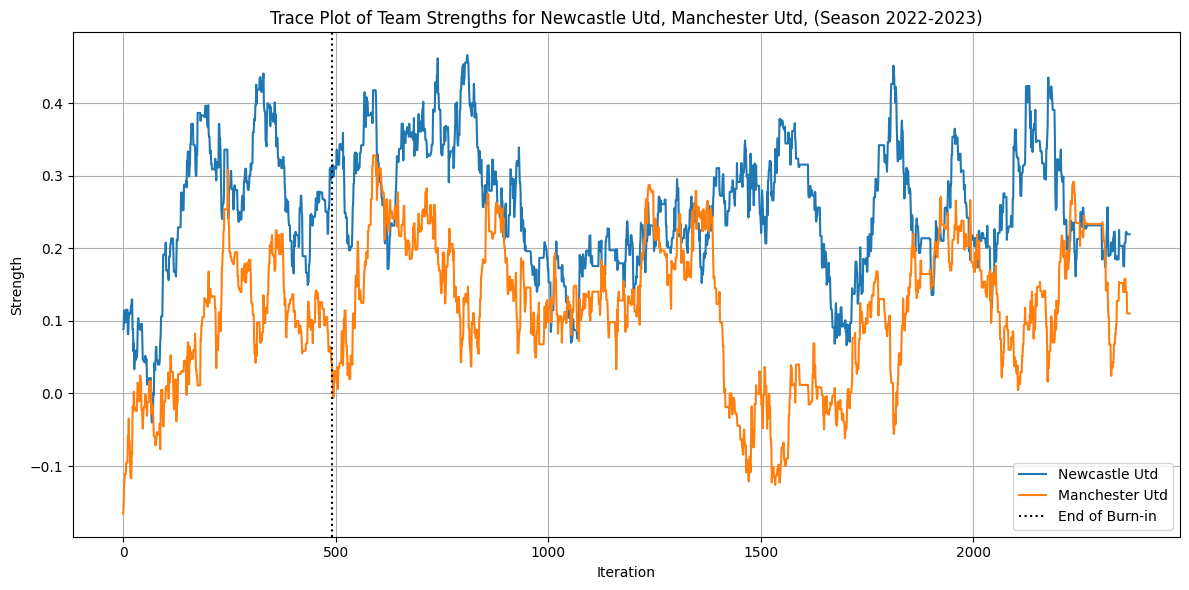

In [33]:
trace_plot_strength_with_burnin(strength_dict, strength_dict_original, ['Newcastle Utd', 'Manchester Utd'], 2023)

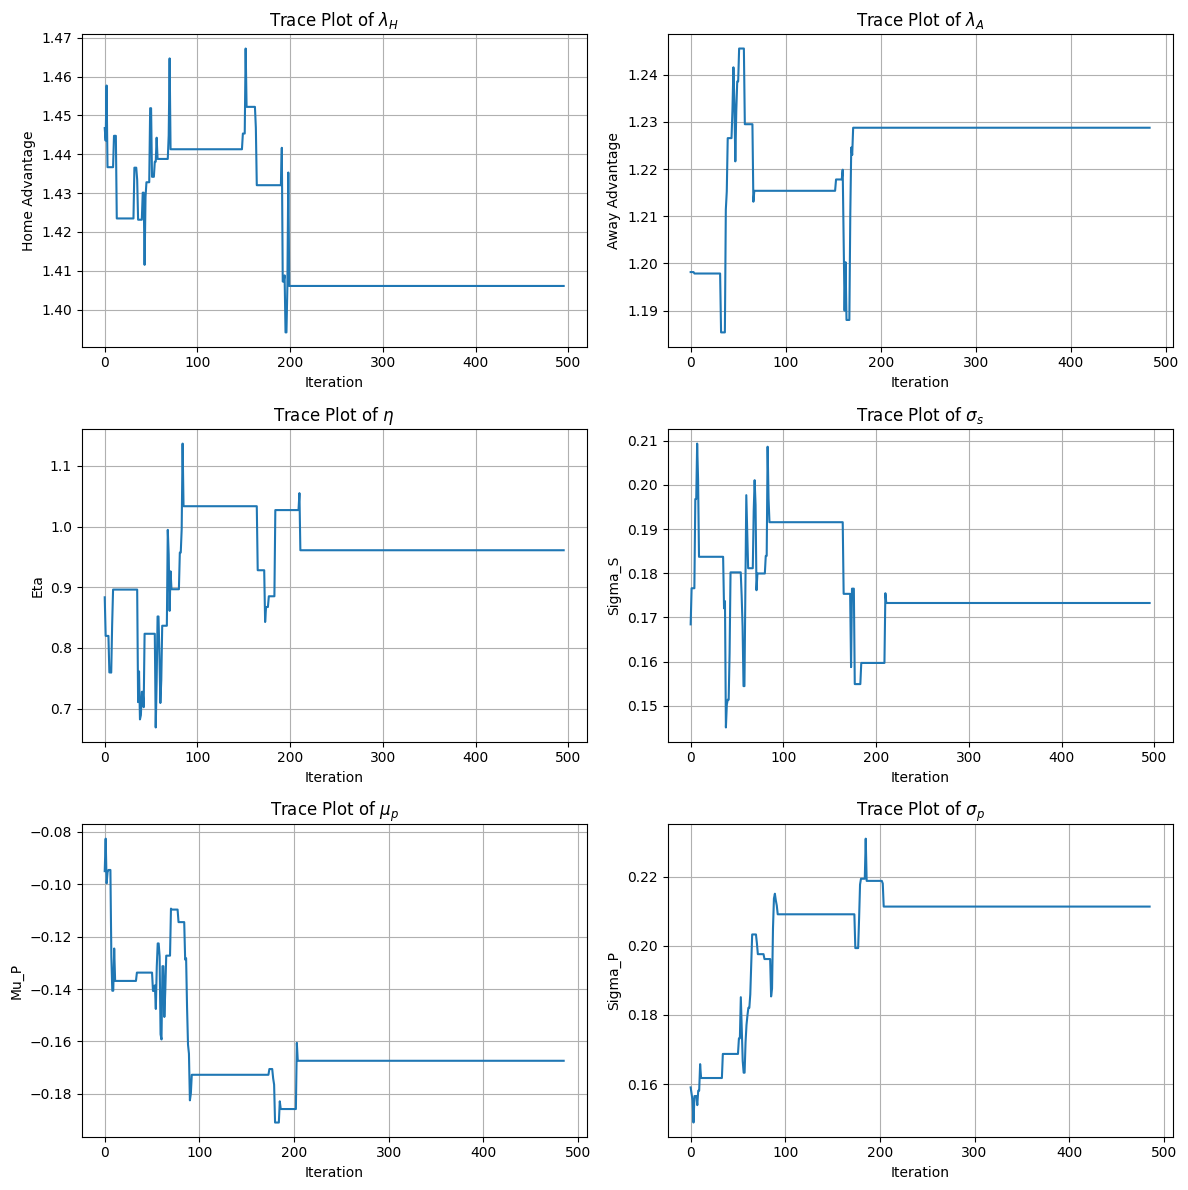

In [34]:
trace_plot_parameter(parameters)


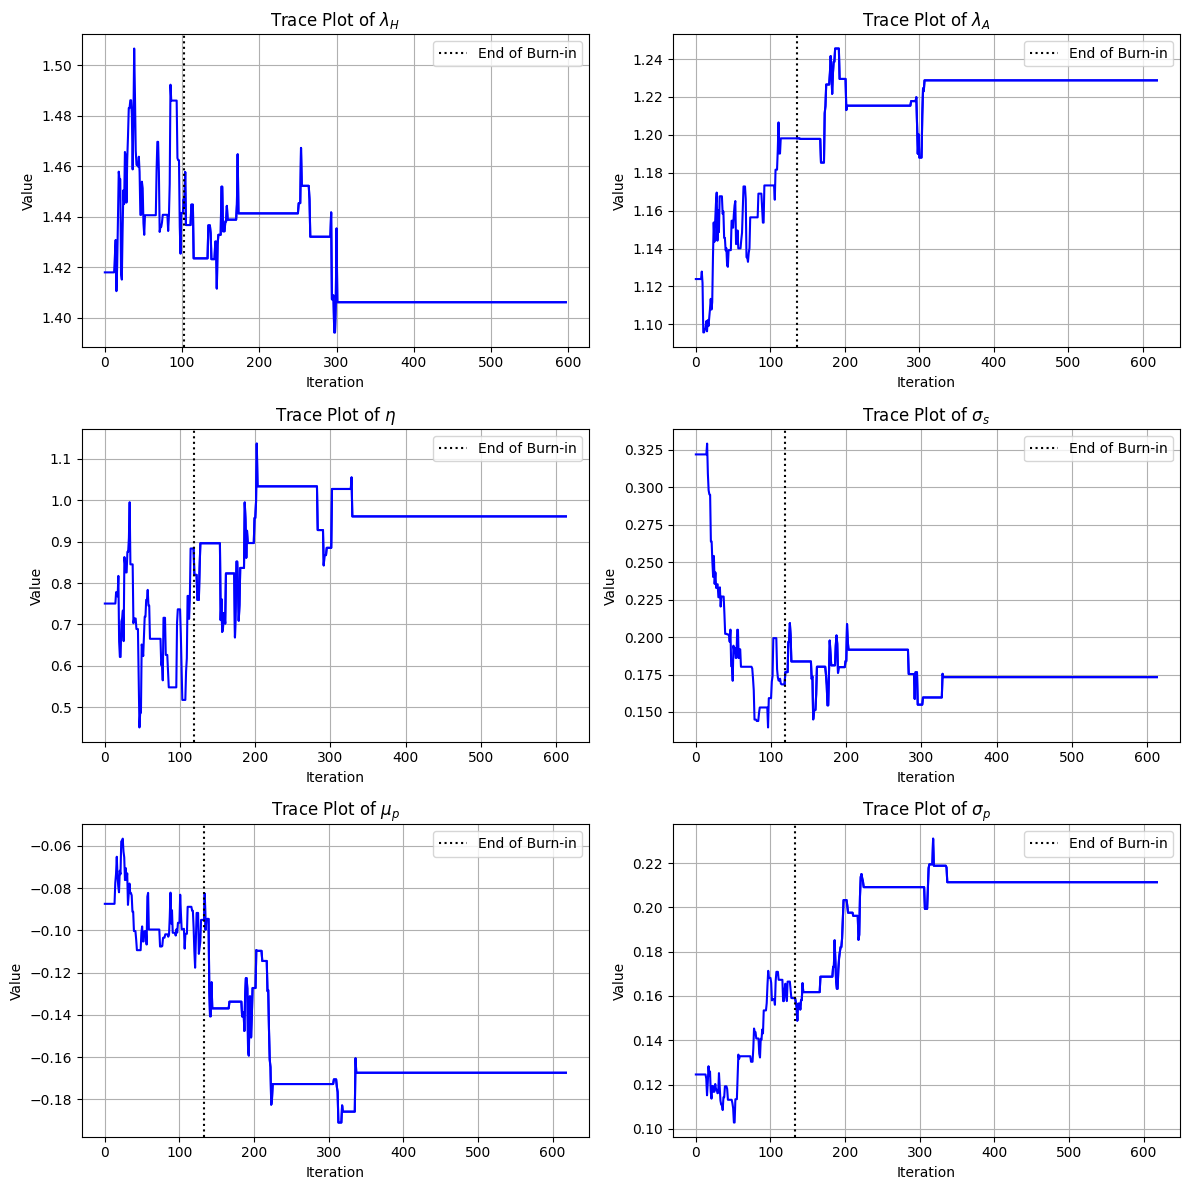

In [35]:
trace_plot_parameter_with_burnin(parameters, parameters_original)

/Users/josephsun/Desktop/M4R/code/mcmc_functions.py:715: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  joined_df['Strength History'] = joined_df.values.tolist()


Manchester City's strength was greater than Manchester Utd's strength in 100.0% of the iterations


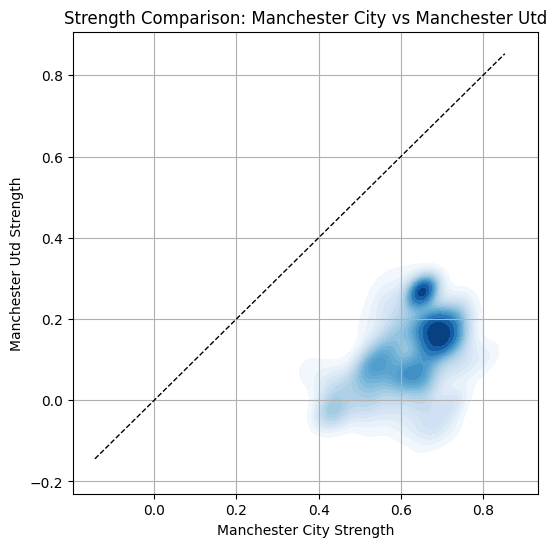

In [36]:
comparison_plot(strength_dict, 'Manchester City', 'Manchester Utd', 2022)

/Users/josephsun/Desktop/M4R/code/mcmc_functions.py:715: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  joined_df['Strength History'] = joined_df.values.tolist()


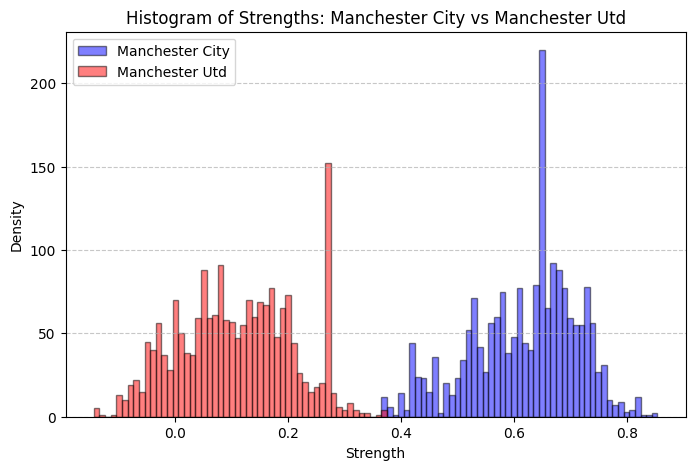

In [37]:
strength_histogram(strength_dict, 'Manchester City', 'Manchester Utd', 2022, bins = 100)


In [3]:
trace_plot_k(parameters)

NameError: name 'parameters' is not defined